In [1]:
#chamando os possíveis pacotes necessários
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn
import os

In [2]:
#abrindo os dados
hdul = fits.open("legacy_spec_allsky_extcorr_mag_colorstar_clean_dr9_phzerr09.fits", ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 1
cat_table = Table(data)
cols=cat_table.columns
print(cat_table)
print(cols)

        ra                 dec         ...       zph_max      
------------------ ------------------- ... -------------------
 37.00144892173838 -0.8032337757237241 ...  0.6752622127532959
37.002155225386716 -0.6663357433549447 ... 0.06514042615890503
 37.00220994340547 -0.7039693372130978 ...  0.2820291817188263
 37.00692359433057 -0.8366880062871013 ...  0.5702391862869263
 37.00800601543056 -0.6365444014147738 ... 0.29677122831344604
 37.03336560324021 -0.8146577691465605 ...  0.8471033573150635
 37.06942836765245   -0.80170323967733 ...  0.8395906686782837
 37.07411383410271 -0.8580913493446098 ...  0.8001366853713989
 37.08837420564123 -0.8340857479488546 ... 0.28362539410591125
 37.09135524570086 -0.7283688773204567 ...  0.9646902680397034
               ...                 ... ...                 ...
351.14768201396953   31.11256472305071 ...  0.8257980346679688
351.18873525859254   31.08059381315727 ...  0.4449918866157532
351.20384937744393   31.10764155992283 ... 0.4158820509

In [3]:
#transformamos em dataframe (pandas) por que é muito fácil dropar dados por lá
df = cat_table.to_pandas()
print(df)

                 ra        dec         z    zErr      MAG_R      MAG_G  \
0         37.001449  -0.803234  0.630587  0.0005  20.236307  21.858757   
1         37.002155  -0.666336  0.095125  0.0005  16.966543  17.523779   
2         37.002210  -0.703969  0.294842  0.0005  19.037716  20.411280   
3         37.006924  -0.836688  0.632515  0.0005  20.482620  21.900679   
4         37.008006  -0.636544  0.288824  0.0005  19.514841  20.325495   
...             ...        ...       ...     ...        ...        ...   
2990918  351.369768  33.949513  0.234286  0.0005  17.938055  19.330910   
2990919  351.384069  33.999928  0.234375  0.0005  16.879234  18.244877   
2990920  351.470403  33.928706  0.340973  0.0005  18.374754  19.986387   
2990921  351.530566  33.929008  0.449943  0.0005  21.171944  22.982758   
2990922  351.532579  34.024283  0.344088  0.0005  18.702463  20.290867   

             MAG_Z     MAG_W1     MAG_W2     MAG_W3  ...  MAGErr_G  MAGErr_Z  \
0        18.843306  17.664024  

In [4]:
#temos que jogar fora primeiro o que não vamos usar, W3 e W4 são bandas com medidas muito incompletas

df.drop('z',
  axis='columns', inplace=True)

df.drop('zErr',
  axis='columns', inplace=True)

df.drop('MAG_W3',
  axis='columns', inplace=True)

df.drop('MAGErr_W3',
  axis='columns', inplace=True)

df.drop('MAG_W4',
  axis='columns', inplace=True)

df.drop('MAGErr_W4',
  axis='columns', inplace=True)

df.drop('training',
  axis='columns', inplace=True)

df.drop('zph_min',
  axis='columns', inplace=True)

df.drop('zph_max',
  axis='columns', inplace=True)

# algumas coisas eram string, então transformo string para número

cls = ['MAG_R','MAG_G','MAG_Z','MAG_W1','MAG_W2','MAGErr_R','MAGErr_G','MAGErr_Z','MAGErr_W1','MAGErr_W2','zspec']
for i in cls:
    df[i] = pd.to_numeric(df[i],errors='coerce')

#algumas coisas nan ele lê como zero então coloquei pra tirar os zeros
df = df[(df[cls] != 0.0).all(axis=1)]

#alguns valores são inf
pd.set_option('mode.use_inf_as_na', True)

#dropar todas as linhas com algum nan
df = df.dropna()

In [7]:
print(df)

                 ra        dec      MAG_R      MAG_G      MAG_Z     MAG_W1  \
0         37.001449  -0.803234  20.236307  21.858757  18.843306  17.664024   
1         37.002155  -0.666336  16.966543  17.523779  16.560616  17.038296   
2         37.002210  -0.703969  19.037716  20.411280  18.348240  18.179388   
3         37.006924  -0.836688  20.482620  21.900679  19.524815  18.355619   
4         37.008006  -0.636544  19.514841  20.325495  19.037266  19.007309   
...             ...        ...        ...        ...        ...        ...   
2990918  351.369768  33.949513  17.938055  19.330910  17.119677  16.866943   
2990919  351.384069  33.999928  16.879234  18.244877  16.039917  15.938845   
2990920  351.470403  33.928706  18.374754  19.986387  17.598866  17.435717   
2990921  351.530566  33.929008  21.171944  22.982758  20.201391  20.675020   
2990922  351.532579  34.024283  18.702463  20.290867  17.921730  17.517828   

            MAG_W2  MAGErr_R  MAGErr_G  MAGErr_Z  MAGErr_W1  MA

In [ ]:
#salvar um novo fits só pra mostrar os histogramas 
cats=Table.from_pandas(df)
cats.write('new.fits')

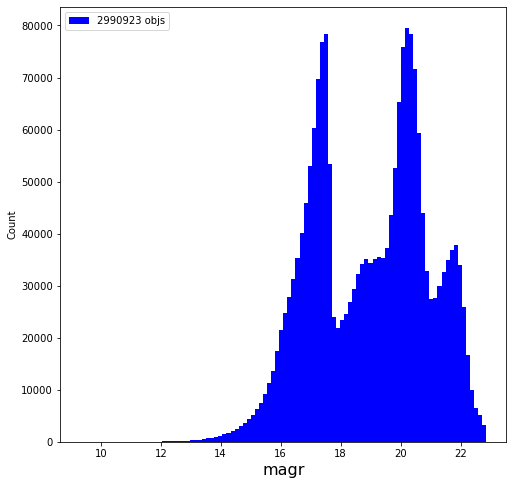

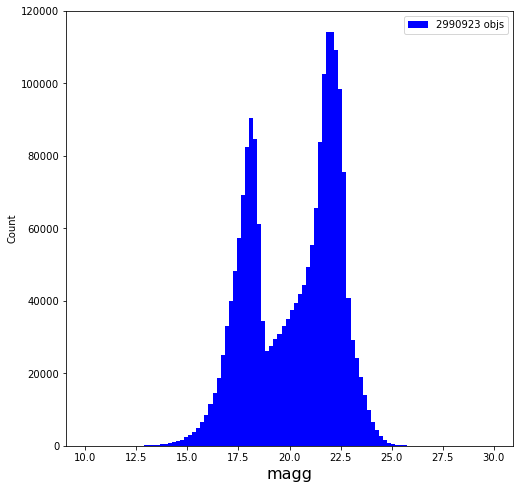

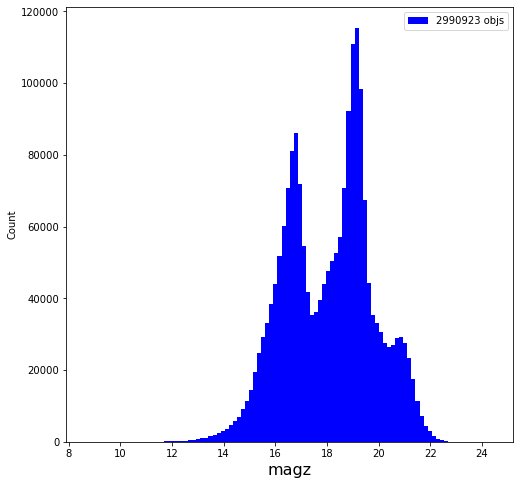

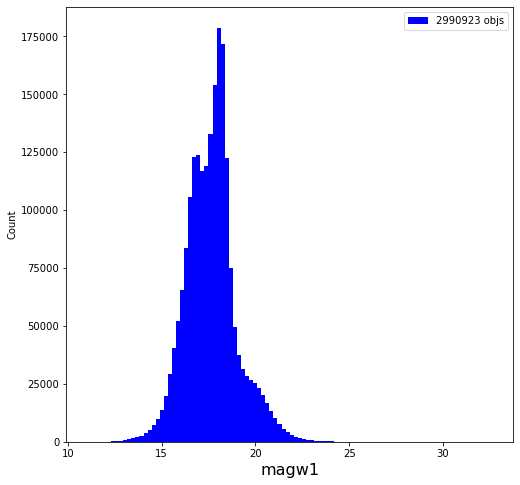

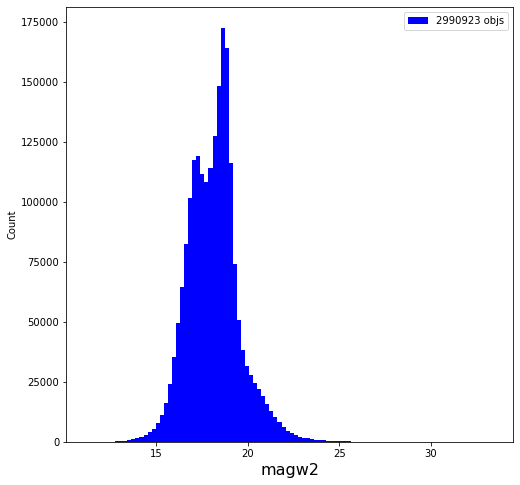

In [9]:
#histogramas
hdul2 = fits.open("new.fits", ignore_missing_end=True) 
data2 = hdul2[1].data # table extensions can't be the first extension, so there's a dummy image extension at 1

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(data2.field('MAG_R')), bins=100, color='blue', label=f'{len(data)} objs')
ax.set_xlabel('magr', fontsize=16)
ax.set_ylabel('Count')
#ax.set_xlim(-0.01,0.01)
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(data2.field('MAG_G')), bins=100, color='blue', label=f'{len(data)} objs')
ax.set_xlabel('magg', fontsize=16)
ax.set_ylabel('Count')
#ax.set_xlim(-0.01,0.01)
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(data2.field('MAG_Z')), bins=100, color='blue', label=f'{len(data)} objs')
ax.set_xlabel('magz', fontsize=16)
ax.set_ylabel('Count')
#ax.set_xlim(-0.01,0.01)
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(data2.field('MAG_W1')), bins=100, color='blue', label=f'{len(data)} objs')
ax.set_xlabel('magw1', fontsize=16)
ax.set_ylabel('Count')
#ax.set_xlim(-0.01,0.01)
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(data2.field('MAG_W2')), bins=100, color='blue', label=f'{len(data)} objs')
ax.set_xlabel('magw2', fontsize=16)
ax.set_ylabel('Count')
#ax.set_xlim(-0.01,0.01)
plt.legend()
plt.show()


Agora vamos fazer o corte nas magnitudes para aceitar apenas erro menor que 0.2
Fiz isso em etapas, para cada magnitude
Binei os dados de magnitude e fiz o gráfico com:
no eixo x, a média dos valores no bin
no eixo y, a média dos erros no bin correspondente

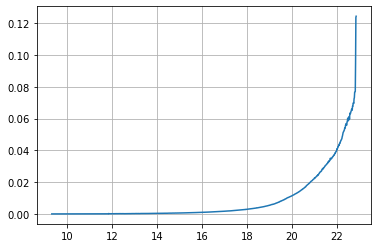

In [10]:
binned = pd.cut(df['MAG_R'],1000)

erro_medio=list()
ponto_medio=list()

for bin in sorted(binned.unique()):
  #print(bin,'\n',df[binned==bin].MAGErr_R.mean())
  ponto_medio.append(df[binned==bin].MAG_R.mean())
  erro_medio.append(df[binned==bin].MAGErr_R.mean())

DF=pd.DataFrame(erro_medio,ponto_medio)
plt.grid(True)
plt.plot(DF)

#NÃO PRECISA CORTAR NADA PQ TÁ TUDO DENTRO DE 0.2 (5 SIGMA)

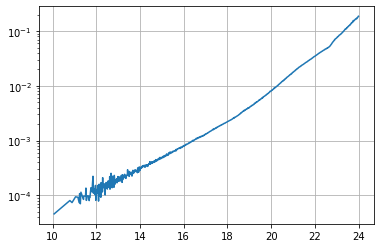

In [12]:
binned = pd.cut(df['MAG_G'],1000)

erro_medio=list()
ponto_medio=list()

for bin in sorted(binned.unique()):
  #print(bin,'\n',df[binned==bin].MAGErr_R.mean())
  ponto_medio.append(df[binned==bin].MAG_G.mean())
  erro_medio.append(df[binned==bin].MAGErr_G.mean())

DF=pd.DataFrame(erro_medio,ponto_medio)
plt.grid(True)
plt.plot(DF)
plt.yscale('log') 

df = df[df['MAG_G'] < 24]

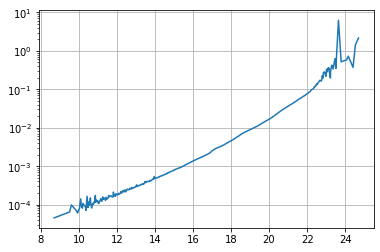

In [13]:
binned = pd.cut(df['MAG_Z'],500)

erro_medio=list()
ponto_medio=list()

for bin in sorted(binned.unique()):
  #print(bin,'\n',df[binned==bin].MAGErr_R.mean())
  ponto_medio.append(df[binned==bin].MAG_Z.mean())
  erro_medio.append(df[binned==bin].MAGErr_Z.mean())

DF=pd.DataFrame(erro_medio,ponto_medio)
plt.grid(True)
plt.plot(DF)
plt.yscale('log') 

df = df[df['MAG_Z'] < 22.7]

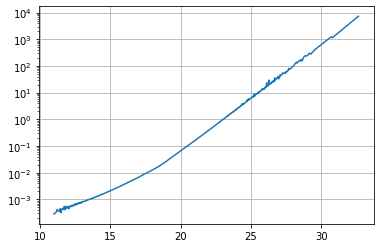

In [14]:

binned = pd.cut(df['MAG_W1'],1000)

erro_medio=list()
ponto_medio=list()

for bin in sorted(binned.unique()):
  #print(bin,'\n',df[binned==bin].MAGErr_R.mean())
  ponto_medio.append(df[binned==bin].MAG_W1.mean())
  erro_medio.append(df[binned==bin].MAGErr_W1.mean())

DF=pd.DataFrame(erro_medio,ponto_medio)
plt.grid(True)
plt.plot(DF)
plt.yscale('log') 

df = df[df['MAG_W1'] < 21.25]

In [ ]:

binned = pd.cut(df['MAG_W2'],1000)

erro_medio=list()
ponto_medio=list()

for bin in sorted(binned.unique()):
  #print(bin,'\n',df[binned==bin].MAGErr_R.mean())
  ponto_medio.append(df[binned==bin].MAG_W2.mean())
  erro_medio.append(df[binned==bin].MAGErr_W2.mean())

DF=pd.DataFrame(erro_medio,ponto_medio)
plt.grid(True)
plt.plot(DF)
plt.yscale('log') 

df = df[df['MAG_W2'] < 20.40]

In [ ]:
#salvando os dados limpos
print(df)
categ=Table.from_pandas(df)
categ.write('proj1.fits')